# Weather Prediction Analysis

### Importing modules

In [55]:
# Don't change this cell; just run it.
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
# This is a magic function that renders the figure in the notebook, instead of displaying a dump of the figure object.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

### Loading the Data

In [56]:
df_init = pd.read_csv('weather_data.csv')
print("Shape: ", df_init.shape)
df_init.head()

Shape:  (79963, 29)


,Row ID,Station ID,Station Name,Station Province,Station Latitude,Station Longitude,Location,Station Elevation (m),Station Climate Identifier,Station WMO Identifier,...,Heating Degree Days (C),Cooling Degree Days (C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precipitation (mm),Snow on Ground (cm),Speed of Maximum Wind Gust (km/h),Direction of Maximum Wind Gust (10s Deg)
0,2721420210414,27214,EDMONTON BLATCHFORD,ALBERTA,53.57,-113.52,"(53.57, -113.52)",671.0,3012209,71157.0,...,10.2,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2721420210415,27214,EDMONTON BLATCHFORD,ALBERTA,53.57,-113.52,"(53.57, -113.52)",671.0,3012209,71157.0,...,9.8,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2721420210510,27214,EDMONTON BLATCHFORD,ALBERTA,53.57,-113.52,"(53.57, -113.52)",671.0,3012209,71157.0,...,9.2,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2721420210511,27214,EDMONTON BLATCHFORD,ALBERTA,53.57,-113.52,"(53.57, -113.52)",671.0,3012209,71157.0,...,6.3,0.0,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN
4,2721420210127,27214,EDMONTON BLATCHFORD,ALBERTA,53.57,-113.52,"(53.57, -113.52)",671.0,3012209,71157.0,...,34.0,0.0,NaN,NaN,NaN,NaN,2.1,18.0,NaN,NaN


### Preprocessing the data

In [57]:
# Extracting columns to retain
cols_retain = ["Date", "Station ID", "Station Name", "Maximum Temperature (C)", "Minimum Temperature (C)", "Total Rain (mm)", "Total Snow (cm)", "Total Precipitation (mm)", "Snow on Ground (cm)"]
df = df_init[cols_retain].copy()

# Renaming columns for convenience
df = df.rename(columns={"Station ID": "Station", "Station Name": "Name", "Maximum Temperature (C)":"MaxTemp", "Minimum Temperature (C)": "MinTemp", "Total Rain (mm)": "Rain", "Total Snow (cm)": "Snow", "Total Precipitation (mm)": "Precip", "Snow on Ground (cm)": "SnowGround"})

# Converting Date to datetime and setting it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Dropping rows with missing values in MaxTemp, MinTemp, MeanTemp
# df = df.dropna(subset=['MaxTemp', 'MinTemp', 'MeanTemp'])

# Filling missing values
cols_fill = ['MaxTemp', 'MinTemp', 'SnowGround']
df[cols_fill] = df[cols_fill].ffill().bfill()

df = df.fillna(0)

print("Shape: ", df.shape)
df

### Another idea is to calculate the null percentage of each of the columns and retain the ones with less than 50%.

Shape:  (79963, 8)


,Station,Name,MaxTemp,MinTemp,Rain,Snow,Precip,SnowGround
Date,,,,,,,,
2000-01-01,30907,EDMONTON NAMAO AWOS A,-10.8,-19.9,0.0,0.0,0.0,1.0
2000-01-01,27492,EDMONTON STONY PLAIN CS,-10.8,-19.9,0.0,4.0,4.0,1.0
2000-01-01,1870,EDMONTON STONY PLAIN,-13.0,-17.5,0.0,4.0,1.6,1.0
2000-01-01,27214,EDMONTON BLATCHFORD,-10.2,-18.6,0.0,2.4,2.4,1.0
2000-01-01,1868,EDMONTON NAMAO A,-10.9,-19.4,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2024-04-29,50149,EDMONTON INTL A,12.1,3.3,0.0,0.0,0.0,0.0
2024-04-29,47088,LEGAL AGCM,9.9,3.7,0.0,0.0,4.2,0.0
2024-04-29,53718,EDMONTON SOUTH CAMPUS,11.0,5.1,0.0,0.0,0.0,0.0


In [58]:
# Final Checks of datatype and NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79963 entries, 2000-01-01 to 2024-04-29
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Station     79963 non-null  int64  
 1   Name        79963 non-null  object 
 2   MaxTemp     79963 non-null  float64
 3   MinTemp     79963 non-null  float64
 4   Rain        79963 non-null  float64
 5   Snow        79963 non-null  float64
 6   Precip      79963 non-null  float64
 7   SnowGround  79963 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 5.5+ MB


In [59]:
# Check for gaps in our data
df.groupby([df.index.year, 'Station']).size()

Date  Station
2000  1868       362
      1870       366
      27214      366
      27492      366
      27793      366
                ... 
2024  46911      107
      47088      107
      50149      120
      51758      120
      53718      107
Length: 233, dtype: int64

In [60]:
df[['Station', 'Name']].drop_duplicates()

,Station,Name
Date,,
2000-01-01,30907,EDMONTON NAMAO AWOS A
2000-01-01,27492,EDMONTON STONY PLAIN CS
2000-01-01,1870,EDMONTON STONY PLAIN
2000-01-01,27214,EDMONTON BLATCHFORD
2000-01-01,1868,EDMONTON NAMAO A
2000-01-01,27793,EDMONTON INTERNATIONAL CS
2003-01-01,41783,OLIVER AGDM
2007-01-01,46850,THORSBY AGCM
2007-01-01,46911,NEW SAREPTA AGCM


In [61]:
# Fill in the id based on the above table
id = [30907,]
df = df[df["Station"].isin(id)]
df.groupby(df.index.year).size()

Date
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    277
2019    365
2020    354
2021    359
2022      5
dtype: int64

### Visualizing the Data

<AxesSubplot: xlabel='Date'>

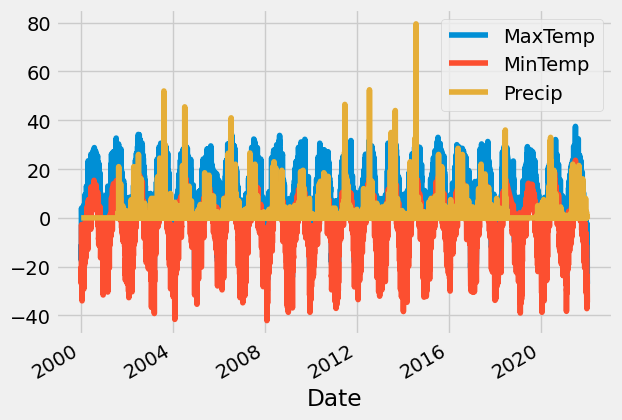

In [62]:
df[['MaxTemp', 'MinTemp', 'Precip']].plot()

### Setting the Target Column

In [63]:
df["Target"] = df.shift(-1)['MaxTemp']
df = df.ffill()
df

C:\Temp\ipykernel_19072\1252371459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"] = df.shift(-1)['MaxTemp']


,Station,Name,MaxTemp,MinTemp,Rain,Snow,Precip,SnowGround,Target
Date,,,,,,,,,
2000-01-01,30907,EDMONTON NAMAO AWOS A,-10.8,-19.9,0.0,0.0,0.0,1.0,-17.4
2000-01-02,30907,EDMONTON NAMAO AWOS A,-17.4,-26.9,0.0,0.0,0.0,1.0,-15.5
2000-01-03,30907,EDMONTON NAMAO AWOS A,-15.5,-22.2,0.0,0.0,0.0,1.0,-12.8
2000-01-04,30907,EDMONTON NAMAO AWOS A,-12.8,-18.4,0.0,0.0,0.0,1.0,-5.1
2000-01-05,30907,EDMONTON NAMAO AWOS A,-5.1,-14.7,0.0,0.0,0.0,2.0,-5.7
...,...,...,...,...,...,...,...,...,...
2022-01-01,30907,EDMONTON NAMAO AWOS A,-8.4,-32.8,0.0,0.0,0.5,26.0,-2.4
2022-01-02,30907,EDMONTON NAMAO AWOS A,-2.4,-23.5,0.0,0.0,0.5,21.0,-22.9
2022-01-03,30907,EDMONTON NAMAO AWOS A,-22.9,-25.5,0.0,0.0,0.5,25.0,-25.2


In [64]:
### Checking for linearity
df.corr()

,Station,MaxTemp,MinTemp,Rain,Snow,Precip,SnowGround,Target
Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxTemp,NaN,1.000000,0.939227,0.081594,-0.110596,0.095415,-0.614049,0.935498
MinTemp,NaN,0.939227,1.000000,0.122295,-0.083381,0.170681,-0.628172,0.890125
Rain,NaN,0.081594,0.122295,1.000000,-0.008128,0.526105,-0.074449,0.084763
Snow,NaN,-0.110596,-0.083381,-0.008128,1.000000,0.170817,0.052636,-0.118555
Precip,NaN,0.095415,0.170681,0.526105,0.170817,1.000000,-0.090151,0.097699
SnowGround,NaN,-0.614049,-0.628172,-0.074449,0.052636,-0.090151,1.000000,-0.595550
Target,NaN,0.935498,0.890125,0.084763,-0.118555,0.097699,-0.595550,1.000000


### Importing training Libraries

In [65]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01)

In [66]:
predictors = df.columns[~df.columns.isin(['Target', 'Name', 'Station'])]
predictors

Index(['MaxTemp', 'MinTemp', 'Rain', 'Snow', 'Precip', 'SnowGround'], dtype='object')

### Training the Model

We will use K-Fold Cross Validation, but we got to be very careful to not use future data to predict the past. So we will use backtest cross validation to account for it.

In [67]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        assert train[predictors].isna().sum().sum() == 0
        assert train[predictors].isin([np.inf, -np.inf]).sum().sum() == 0

        model.fit(train[predictors], train['Target'])

        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["Target"], preds], axis=1) # Concatenate real test data with predictions to calculate error

        combined.columns = ["actual", "predicted"]
        combined["diff"] = (combined["predicted"] - combined["actual"]).abs()
        all_predictions.append(combined)
    
    return pd.concat(all_predictions, axis=0)

In [68]:
predictions = backtest(df, rr, predictors, start=1)

In [69]:
predictions

,actual,predicted,diff
Date,,,
2000-01-02,-15.5,-17.400000,1.900000
2000-01-03,-12.8,-17.400000,4.600000
2000-01-04,-5.1,-17.400000,12.300000
2000-01-05,-5.7,-17.400000,11.700000
2000-01-06,4.0,-17.400000,21.400000
...,...,...,...
2022-01-01,-2.4,-9.157578,6.757578
2022-01-02,-22.9,-3.069313,19.830687
2022-01-03,-25.2,-20.540119,4.659881


### Learning the accuracy

In [70]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["predicted"])

3.6584253189119122

### Improving our model

In [71]:
def pct_diff(old, new):
    return np.clip((new - old) / old, np.finfo(np.float64).min, np.finfo(np.float64).max)

def compute_rolling(weather, horizon, col):
    label = f"{col}_rolling_{horizon}"

    weather[label] = weather[col].rolling(horizon).mean()
    # weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]

for horizon in rolling_horizons:
    for col in ["MaxTemp", "MinTemp", "Precip"]:
        df = compute_rolling(df, horizon, col)

In [72]:
df 

,Station,Name,MaxTemp,MinTemp,Rain,Snow,Precip,SnowGround,Target,MaxTemp_rolling_3,MinTemp_rolling_3,Precip_rolling_3,MaxTemp_rolling_14,MinTemp_rolling_14,Precip_rolling_14
Date,,,,,,,,,,,,,,,
2000-01-01,30907,EDMONTON NAMAO AWOS A,-10.8,-19.9,0.0,0.0,0.0,1.0,-17.4,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,30907,EDMONTON NAMAO AWOS A,-17.4,-26.9,0.0,0.0,0.0,1.0,-15.5,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,30907,EDMONTON NAMAO AWOS A,-15.5,-22.2,0.0,0.0,0.0,1.0,-12.8,-14.566667,-23.000000,0.000000,NaN,NaN,NaN
2000-01-04,30907,EDMONTON NAMAO AWOS A,-12.8,-18.4,0.0,0.0,0.0,1.0,-5.1,-15.233333,-22.500000,0.000000,NaN,NaN,NaN
2000-01-05,30907,EDMONTON NAMAO AWOS A,-5.1,-14.7,0.0,0.0,0.0,2.0,-5.7,-11.133333,-18.433333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,30907,EDMONTON NAMAO AWOS A,-8.4,-32.8,0.0,0.0,0.5,26.0,-2.4,-18.633333,-32.666667,0.166667,-17.100000,-26.600000,0.464286
2022-01-02,30907,EDMONTON NAMAO AWOS A,-2.4,-23.5,0.0,0.0,0.5,21.0,-22.9,-11.800000,-29.466667,0.333333,-16.100000,-26.285714,0.500000
2022-01-03,30907,EDMONTON NAMAO AWOS A,-22.9,-25.5,0.0,0.0,0.5,25.0,-25.2,-11.233333,-27.266667,0.500000,-16.978571,-26.928571,0.464286


In [73]:
# Remove the first 14 rows which has missing values
df = df.iloc[14:,:]
df

,Station,Name,MaxTemp,MinTemp,Rain,Snow,Precip,SnowGround,Target,MaxTemp_rolling_3,MinTemp_rolling_3,Precip_rolling_3,MaxTemp_rolling_14,MinTemp_rolling_14,Precip_rolling_14
Date,,,,,,,,,,,,,,,
2000-01-15,30907,EDMONTON NAMAO AWOS A,-21.1,-34.0,0.0,0.0,0.0,7.0,-14.5,-21.700000,-28.000000,0.000000,-11.207143,-17.878571,0.000000
2000-01-16,30907,EDMONTON NAMAO AWOS A,-14.5,-28.7,0.0,0.0,0.0,8.0,-18.1,-19.366667,-29.233333,0.000000,-11.000000,-18.007143,0.000000
2000-01-17,30907,EDMONTON NAMAO AWOS A,-18.1,-21.3,0.0,0.0,0.0,22.0,-15.3,-17.900000,-28.000000,0.000000,-11.185714,-17.942857,0.000000
2000-01-18,30907,EDMONTON NAMAO AWOS A,-15.3,-24.8,0.0,0.0,0.0,22.0,-10.7,-15.966667,-24.933333,0.000000,-11.364286,-18.400000,0.000000
2000-01-19,30907,EDMONTON NAMAO AWOS A,-10.7,-23.1,0.0,0.0,0.0,23.0,-6.5,-14.700000,-23.066667,0.000000,-11.764286,-19.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,30907,EDMONTON NAMAO AWOS A,-8.4,-32.8,0.0,0.0,0.5,26.0,-2.4,-18.633333,-32.666667,0.166667,-17.100000,-26.600000,0.464286
2022-01-02,30907,EDMONTON NAMAO AWOS A,-2.4,-23.5,0.0,0.0,0.5,21.0,-22.9,-11.800000,-29.466667,0.333333,-16.100000,-26.285714,0.500000
2022-01-03,30907,EDMONTON NAMAO AWOS A,-22.9,-25.5,0.0,0.0,0.5,25.0,-25.2,-11.233333,-27.266667,0.500000,-16.978571,-26.928571,0.464286


In [74]:
# Changing all null values to 0
df = df.fillna(0)

### Adding more predictors
Finding the average specific to the month eyeballing to all the years since 2000.

In [75]:
# Take all the rows previous to the current row and calculate the mean
def expand_mean(df):
    return df.expanding(1).mean()

# Calculate the mean of the columns for each month of all the years
for col in ["MaxTemp", "MinTemp", "Precip"]:
    df[f"month_avg_{col}"] = df[col].groupby(df.index.month, group_keys=False).apply(expand_mean)
    df[f"day_avg_{col}"] = df[col].groupby(df.index.day_of_year, group_keys=False).apply(expand_mean)

In [76]:
predictors = df.columns[~df.columns.isin(['Target', 'Name', 'Station'])]
predictors

Index(['MaxTemp', 'MinTemp', 'Rain', 'Snow', 'Precip', 'SnowGround',
       'MaxTemp_rolling_3', 'MinTemp_rolling_3', 'Precip_rolling_3',
       'MaxTemp_rolling_14', 'MinTemp_rolling_14', 'Precip_rolling_14',
       'month_avg_MaxTemp', 'day_avg_MaxTemp', 'month_avg_MinTemp',
       'day_avg_MinTemp', 'month_avg_Precip', 'day_avg_Precip'],
      dtype='object')

Remove NaN, infinity or a value too large for dtype('float64')

In [77]:
predictions = backtest(df, rr, predictors)

In [78]:
predictions

,actual,predicted,diff
Date,,,
2010-01-12,-0.2,-0.640225,0.440225
2010-01-13,1.5,-1.992372,3.492372
2010-01-14,4.2,-0.676246,4.876246
2010-01-15,2.4,1.698318,0.701682
2010-01-16,-2.8,0.294412,3.094412
...,...,...,...
2022-01-01,-2.4,-7.467380,5.067380
2022-01-02,-22.9,-3.048101,19.851899
2022-01-03,-25.2,-20.289040,4.910960


In [79]:
mean_absolute_error(predictions["actual"], predictions["predicted"])

3.3672353010022493

In [80]:
predictions.sort_values("diff", ascending=False)

,actual,predicted,diff
Date,,,
2022-01-02,-22.9,-3.048101,19.851899
2013-12-27,-18.3,1.366259,19.666259
2013-12-22,2.9,-15.267383,18.167383
2014-12-08,11.2,-5.857004,17.057004
2018-01-12,0.3,-16.541355,16.841355
...,...,...,...
2015-01-28,-1.7,-1.692175,0.007825
2016-06-12,21.3,21.306578,0.006578
2018-03-02,-7.1,-7.096593,0.003407


<AxesSubplot: >

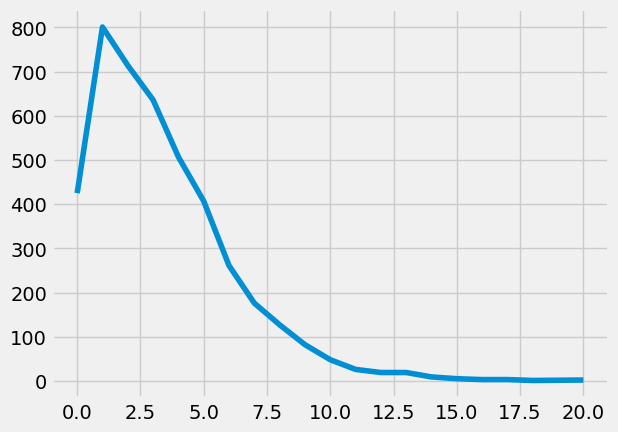

In [81]:
predictions["diff"].round().value_counts().sort_index().plot()